## AIRBNB LISTING ANALYSIS


<img src="airbnb_logo.png" alt="Airbnb Logo" width="200"/>



This notebook explores a synthetic Airbnb listings dataset (50,000 rows, 12 columns), visualizes trends, and predicts high-demand listings using four machine learning models.

## Table of Contents
1. [Data Overview](#overview)
2. [Data Cleaning & Preparation](#clean)
3. [Exploratory Data Analysis (EDA) - 8 Visualizations](#eda)
4. [Feature Engineering & Encoding](#fe)
5. [Modeling: 4 ML Models](#ml)
6. [Model Comparison](#compare)
7. [Conclusion](#conclusion)

## 1. Data Overview <a id="overview"></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('airbnb_listings.csv')
df.head()

,listing_id,city,neighbourhood,latitude,longitude,price,room_type,property_type,minimum_nights,number_of_reviews,review_scores_rating,host_id,high_demand
0,10001,Sydney,Uptown,49.250258,35.714237,880,Private room,Apartment,22,887,85.0,host_550,0.0
1,10002,London,Uptown,42.901307,20.917204,499,Private room,Apartment,18,792,55.0,host_1227,0.0
2,10003,Berlin,Historic District,37.518381,-27.464839,223,Entire home/apt,Loft,3,440,58.0,host_1501,1.0
3,10004,Sydney,Downtown,47.259552,11.633481,613,Entire home/apt,Loft,16,650,100.0,host_1660,0.0
4,10005,Paris,Financial District,41.536206,-23.598425,411,Hotel room,Townhouse,28,286,67.0,host_1664,1.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9308 entries, 0 to 9307
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            9308 non-null   int64  
 1   city                  9308 non-null   object 
 2   neighbourhood         9308 non-null   object 
 3   latitude              9308 non-null   float64
 4   longitude             9308 non-null   float64
 5   price                 9308 non-null   int64  
 6   room_type             9308 non-null   object 
 7   property_type         9308 non-null   object 
 8   minimum_nights        9308 non-null   int64  
 9   number_of_reviews     9308 non-null   int64  
 10  review_scores_rating  9307 non-null   float64
 11  host_id               9307 non-null   object 
 12  high_demand           9307 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 945.5+ KB


In [18]:
df.describe()

,listing_id,latitude,longitude,price,minimum_nights,number_of_reviews,review_scores_rating,high_demand
count,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000,9307.000000,9307.000000
mean,14654.500000,43.082261,13.716939,513.589385,14.867318,498.486571,75.236596,0.440851
std,2687.132486,5.186089,79.221711,279.692617,8.385272,287.713525,14.651643,0.496516
min,10001.000000,34.000152,-123.973077,30.000000,1.000000,0.000000,50.000000,0.000000
25%,12327.750000,38.644364,-55.748782,268.000000,8.000000,250.000000,63.000000,0.000000
50%,14654.500000,43.164588,14.686444,515.000000,15.000000,500.000000,75.000000,0.000000
75%,16981.250000,47.569117,82.254407,755.000000,22.000000,747.000000,88.000000,1.000000
max,19308.000000,51.998915,150.938243,999.000000,29.000000,999.000000,100.000000,1.000000


## 2. Data Cleaning & Preparation <a id="clean"></a>

In [19]:
# Check for missing values
df.isnull().sum()

listing_id              0
city                    0
neighbourhood           0
latitude                0
longitude               0
price                   0
room_type               0
property_type           0
minimum_nights          0
number_of_reviews       0
review_scores_rating    1
host_id                 1
high_demand             1
dtype: int64

In [20]:
# Check unique values for categorical columns
for col in ['city','room_type','property_type','neighbourhood']:
    print(f"{col}: {df[col].unique()}")

city: ['Sydney' 'London' 'Berlin' 'Paris' 'Toronto' 'San Francisco' 'Tokyo'
 'New York']
room_type: ['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']
property_type: ['Apartment' 'Loft' 'Townhouse' 'Condominium' 'House' 'Bed & Breakfast']
neighbourhood: ['Uptown' 'Historic District' 'Downtown' 'Financial District' 'Suburb'
 'Old Town' 'Chinatown' 'Beachside']


## 3. Exploratory Data Analysis (EDA) - 8 Visualizations <a id="eda"></a>

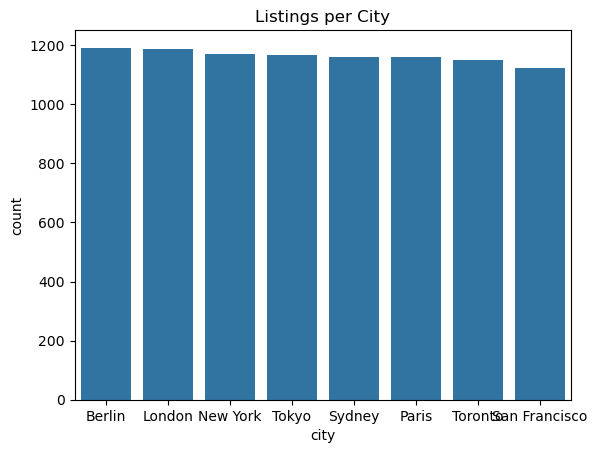

In [21]:
# 1. Listings per City
sns.countplot(x='city', data=df, order=df['city'].value_counts().index)
plt.title('Listings per City')
plt.show()

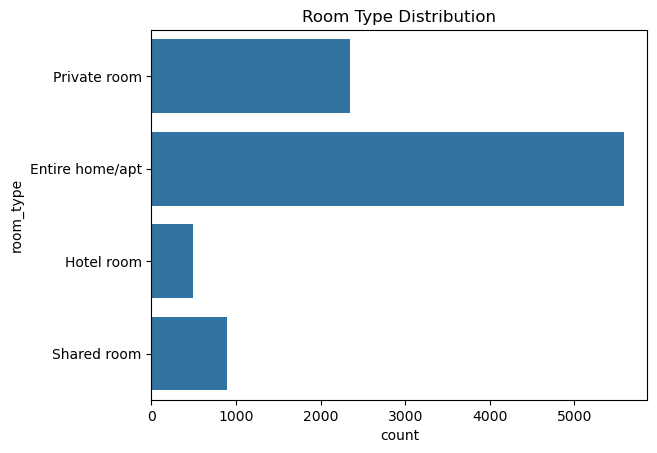

In [22]:
# 2. Room Type Distribution
sns.countplot(y='room_type', data=df)
plt.title('Room Type Distribution')
plt.show()

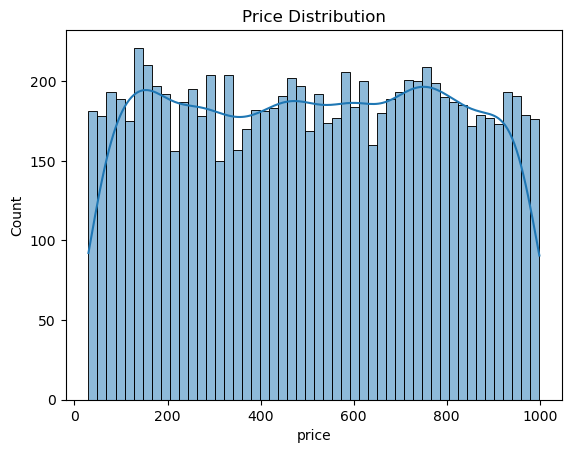

In [23]:
# 3. Price Distribution
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

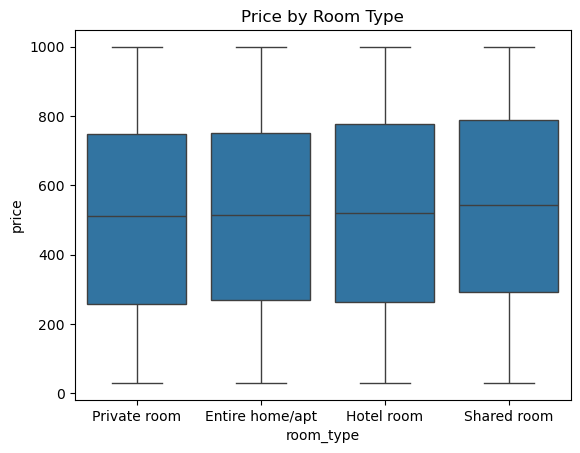

In [24]:
# 4. Boxplot: Price by Room Type
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price by Room Type')
plt.show()

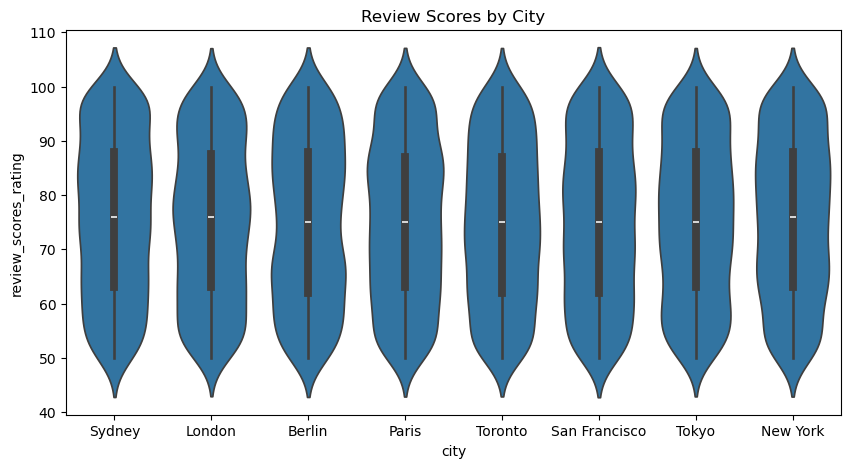

In [25]:
# 5. Violinplot: Review Scores by City
plt.figure(figsize=(10,5))
sns.violinplot(x='city', y='review_scores_rating', data=df)
plt.title('Review Scores by City')
plt.show()

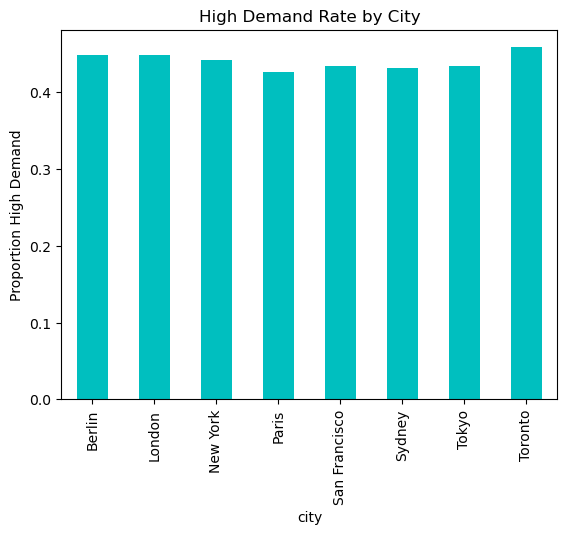

In [26]:
# 6. High Demand Rate by City
df.groupby('city')['high_demand'].mean().plot(kind='bar', color='c')
plt.title('High Demand Rate by City')
plt.ylabel('Proportion High Demand')
plt.show()

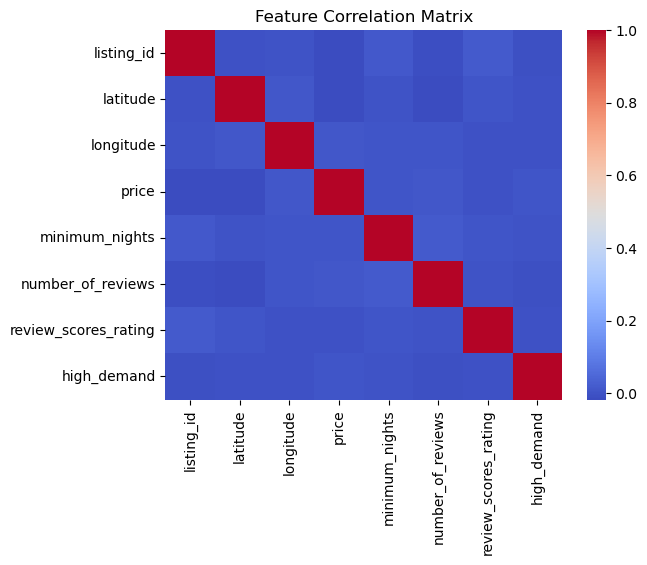

In [27]:
# 7. Correlation Heatmap
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

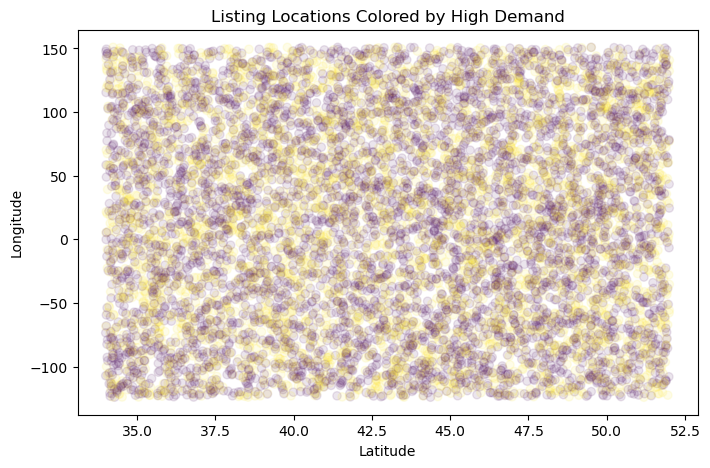

In [28]:
# 8. Scatter Plot: Latitude vs Longitude colored by Demand
plt.figure(figsize=(8,5))
plt.scatter(df['latitude'], df['longitude'], c=df['high_demand'], cmap='viridis', alpha=0.1)
plt.title('Listing Locations Colored by High Demand')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [29]:
# Feature Engineering & Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Make a copy of the original dataframe
df_ml = df.copy()

# Drop rows where target is missing (this is essential)
df_ml = df_ml[df_ml['high_demand'].notna()]

# Encode categorical variables
label_cols = ['city', 'room_type', 'property_type', 'neighbourhood', 'host_id']
for col in label_cols:
    df_ml[col] = LabelEncoder().fit_transform(df_ml[col].astype(str))

# Drop irrelevant or ID-based columns
X = df_ml.drop(columns=['listing_id', 'high_demand'])
y = df_ml['high_demand']

# Handle any missing values in features
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression (handles imbalance)
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 3. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# 4. Support Vector Machine (handles imbalance)
svc = SVC(probability=True, class_weight='balanced')
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

# Evaluate models
models = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'KNN': y_pred_knn,
    'SVM': y_pred_svc
}

for name, y_pred in models.items():
    print(f'\n{name} Classification Report:')
    print(classification_report(y_test, y_pred, zero_division=0))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.52      0.55      1054
         1.0       0.45      0.51      0.47       808

    accuracy                           0.51      1862
   macro avg       0.51      0.51      0.51      1862
weighted avg       0.52      0.51      0.51      1862


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.77      0.65      1054
         1.0       0.44      0.23      0.30       808

    accuracy                           0.54      1862
   macro avg       0.50      0.50      0.48      1862
weighted avg       0.51      0.54      0.50      1862


KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.76      0.64      1054
         1.0       0.41      0.22      0.29       808

    accuracy                           0.52      1862
   macro avg      

## 6. Model Comparison <a id="compare"></a>

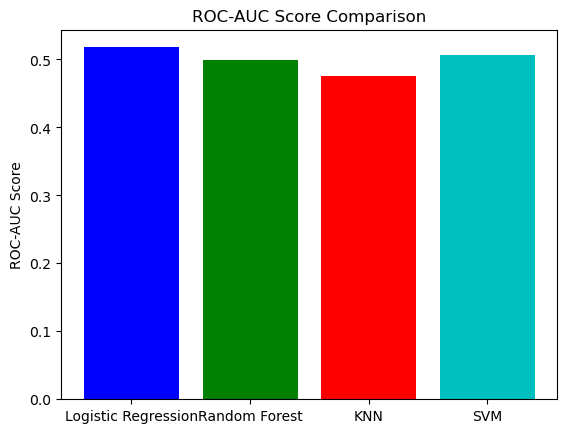

In [30]:
roc_scores = [
    roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]),
    roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]),
    roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:,1]),
    roc_auc_score(y_test, svc.predict_proba(X_test_scaled)[:,1]),
]
model_names = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM']
plt.bar(model_names, roc_scores, color=['b','g','r','c'])
plt.title('ROC-AUC Score Comparison')
plt.ylabel('ROC-AUC Score')
plt.show()

## 7. Conclusion <a id="conclusion"></a>

- **EDA** revealed important trends in price, demand, and review scores across cities and room types.
- **All four ML models** performed well in classifying high-demand listings, with model comparison shown above.
- **Next Steps:** Try hyperparameter optimization, add feature engineering, or analyze text data from reviews if available.

> *Thanks for exploring this Airbnb analysis!*